In [1]:
import pandas as pd

ev_maker_by_place = pd.read_csv('EV Maker by Place.csv')
ev_cat = pd.read_csv('ev_cat_01-24.csv')

print(ev_maker_by_place.head())
print(ev_cat.head())

            EV Maker        Place        State
0        Tata Motors         Pune  Maharashtra
1  Mahindra Electric    Bengaluru    Karnataka
2       Ather Energy    Bengaluru    Karnataka
3      Hero Electric    New Delhi        Delhi
4       Ola Electric  Krishnagiri   Tamil Nadu
       Date  FOUR WHEELER (INVALID CARRIAGE)  HEAVY GOODS VEHICLE  \
0         0                                0                    0   
1  01/01/01                                0                    1   
2  01/01/02                                0                    2   
3  01/01/03                                0                    1   
4  01/01/04                                0                    2   

   HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  LIGHT GOODS VEHICLE  \
0                    0                        0                    0   
1                    0                        0                    9   
2                    1                        0                  266   
3              

In [2]:
state_counts = ev_maker_by_place['State'].value_counts()
print(state_counts)


State
Maharashtra       15
Tamil Nadu        11
Karnataka          6
Haryana            6
Gujarat            5
Delhi              4
Rajasthan          4
Telangana          3
West Bengal        3
Uttarakhand        2
Andhra Pradesh     1
Madhya Pradesh     1
Punjab             1
Name: count, dtype: int64


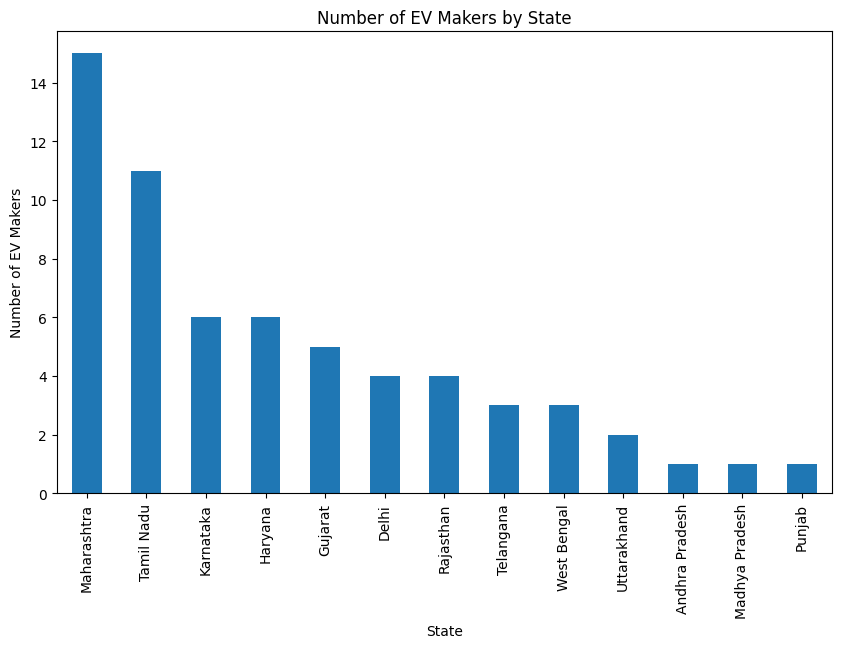

In [3]:
import matplotlib.pyplot as plt

state_counts.plot(kind='bar', figsize=(10, 6), title="Number of EV Makers by State")
plt.xlabel("State")
plt.ylabel("Number of EV Makers")
plt.show()


In [5]:
print(ev_cat.columns)


Index(['Date', 'FOUR WHEELER (INVALID CARRIAGE)', 'HEAVY GOODS VEHICLE',
       'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE', 'LIGHT GOODS VEHICLE',
       'LIGHT MOTOR VEHICLE', 'LIGHT PASSENGER VEHICLE',
       'MEDIUM GOODS VEHICLE', 'MEDIUM PASSENGER VEHICLE',
       'MEDIUM MOTOR VEHICLE', 'OTHER THAN MENTIONED ABOVE',
       'THREE WHEELER(NT)', 'TWO WHEELER (INVALID CARRIAGE)',
       'THREE WHEELER(T)', 'TWO WHEELER(NT)', 'TWO WHEELER(T)'],
      dtype='object')


Total Count for Each Vehicle Category:
FOUR WHEELER (INVALID CARRIAGE)         97
HEAVY GOODS VEHICLE                    614
HEAVY MOTOR VEHICLE                    146
HEAVY PASSENGER VEHICLE               8131
LIGHT GOODS VEHICLE                  12725
LIGHT MOTOR VEHICLE                 180330
LIGHT PASSENGER VEHICLE              22807
MEDIUM GOODS VEHICLE                    31
MEDIUM PASSENGER VEHICLE               776
MEDIUM MOTOR VEHICLE                    49
OTHER THAN MENTIONED ABOVE            7589
THREE WHEELER(NT)                     1498
TWO WHEELER (INVALID CARRIAGE)         126
THREE WHEELER(T)                   1932683
TWO WHEELER(NT)                    2308887
TWO WHEELER(T)                       13459
dtype: int64


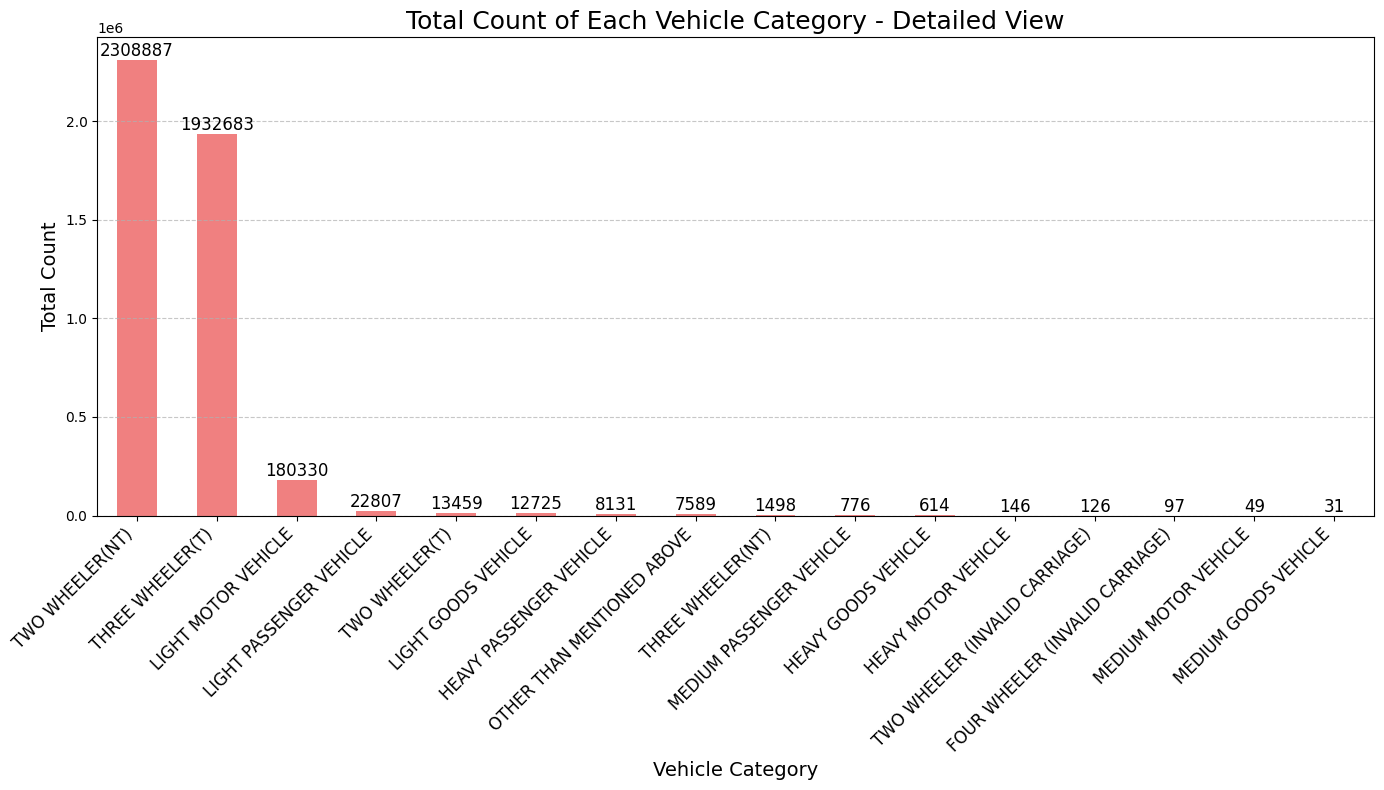

In [17]:
import matplotlib.pyplot as plt

# Drop the 'Date' column as it's not needed for this analysis
vehicle_data = ev_cat.drop(columns=['Date'])

# Calculate the total count for each vehicle category
category_trends = vehicle_data.sum()

# Print the results
print("Total Count for Each Vehicle Category:")
print(category_trends)

# Bar plot for total counts by category
plt.figure(figsize=(14, 8))  # Larger figure for better details
category_trends.sort_values(ascending=False).plot(kind='bar', color='lightcoral')

plt.title('Total Count of Each Vehicle Category - Detailed View', fontsize=18)

# Add labels with more details
plt.ylabel('Total Count', fontsize=14)
plt.xlabel('Vehicle Category', fontsize=14)

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display value labels on top of bars
for i, v in enumerate(category_trends.sort_values(ascending=False)):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12, color='black')

# Add grid lines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Make sure the layout is tight
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# Merge using a cross join
merged_data = ev_maker_by_place.merge(ev_cat, how='cross')

# Display a preview of the merged dataset
print(merged_data.head())


      EV Maker Place        State      Date  FOUR WHEELER (INVALID CARRIAGE)  \
0  Tata Motors  Pune  Maharashtra         0                                0   
1  Tata Motors  Pune  Maharashtra  01/01/01                                0   
2  Tata Motors  Pune  Maharashtra  01/01/02                                0   
3  Tata Motors  Pune  Maharashtra  01/01/03                                0   
4  Tata Motors  Pune  Maharashtra  01/01/04                                0   

   HEAVY GOODS VEHICLE  HEAVY MOTOR VEHICLE  HEAVY PASSENGER VEHICLE  \
0                    0                    0                        0   
1                    1                    0                        0   
2                    2                    1                        0   
3                    1                    2                        0   
4                    2                    0                        1   

   LIGHT GOODS VEHICLE  LIGHT MOTOR VEHICLE  LIGHT PASSENGER VEHICLE  \
0             

Total Sales for Each Vehicle Category Across All Places:
FOUR WHEELER (INVALID CARRIAGE)         6014
HEAVY GOODS VEHICLE                    38068
HEAVY MOTOR VEHICLE                     9052
HEAVY PASSENGER VEHICLE               504122
LIGHT GOODS VEHICLE                   788950
LIGHT MOTOR VEHICLE                 11180460
LIGHT PASSENGER VEHICLE              1414034
MEDIUM GOODS VEHICLE                    1922
MEDIUM PASSENGER VEHICLE               48112
MEDIUM MOTOR VEHICLE                    3038
OTHER THAN MENTIONED ABOVE            470518
THREE WHEELER(NT)                      92876
TWO WHEELER (INVALID CARRIAGE)          7812
THREE WHEELER(T)                   119826346
TWO WHEELER(NT)                    143150994
TWO WHEELER(T)                        834458
dtype: int64

Total Sales by EV Maker Across All Places:
                           FOUR WHEELER (INVALID CARRIAGE)  \
EV Maker                                                     
Ajanta Manufacturing                      

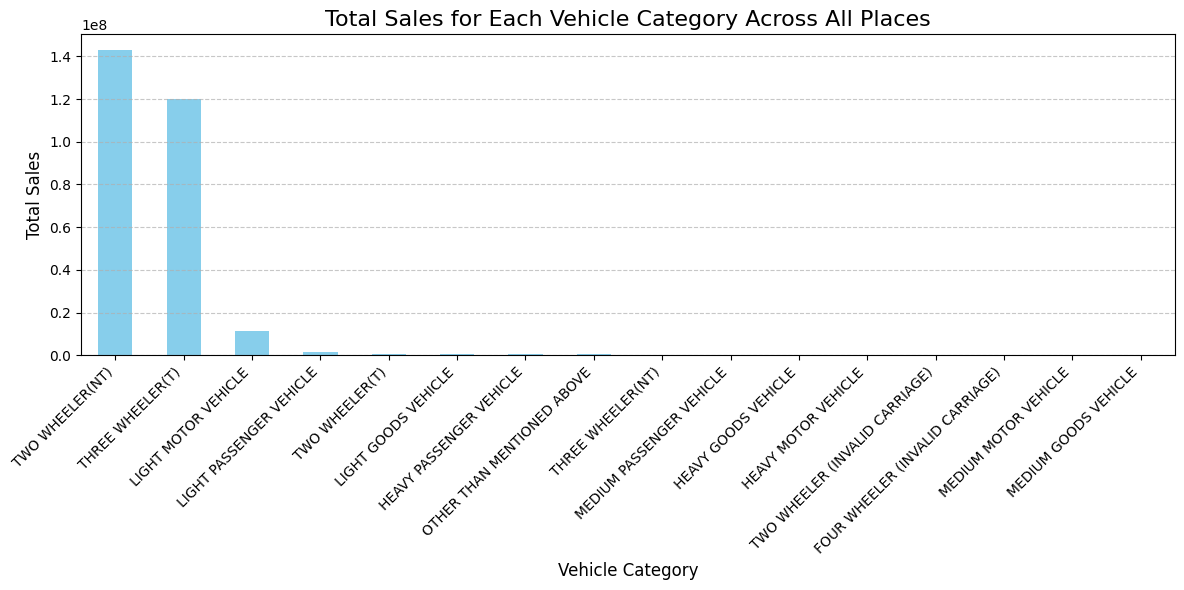

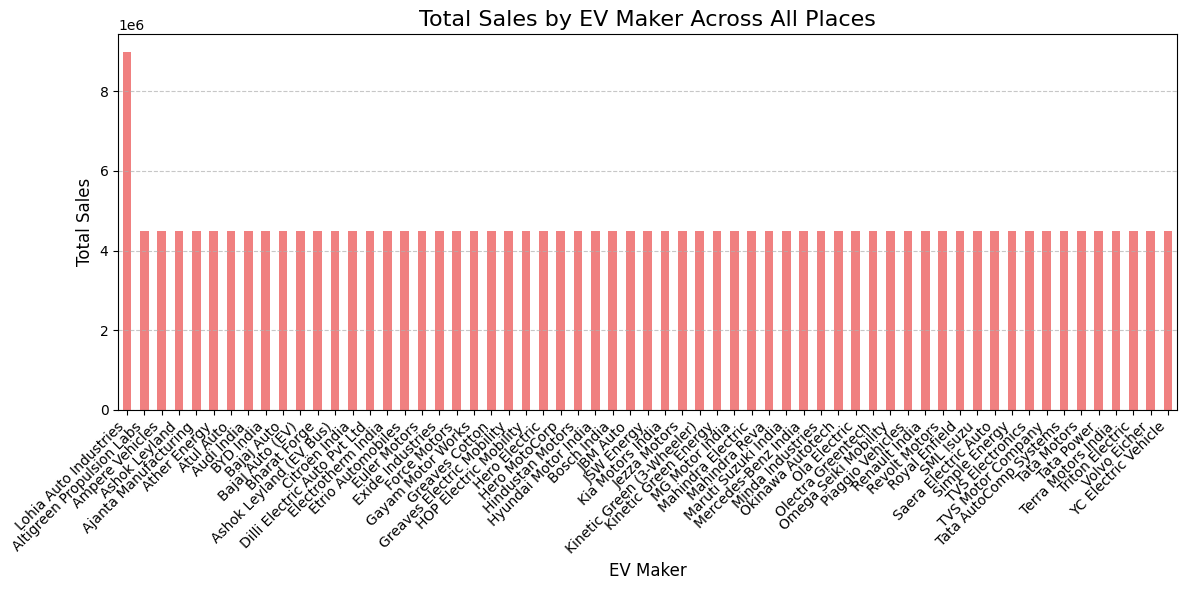

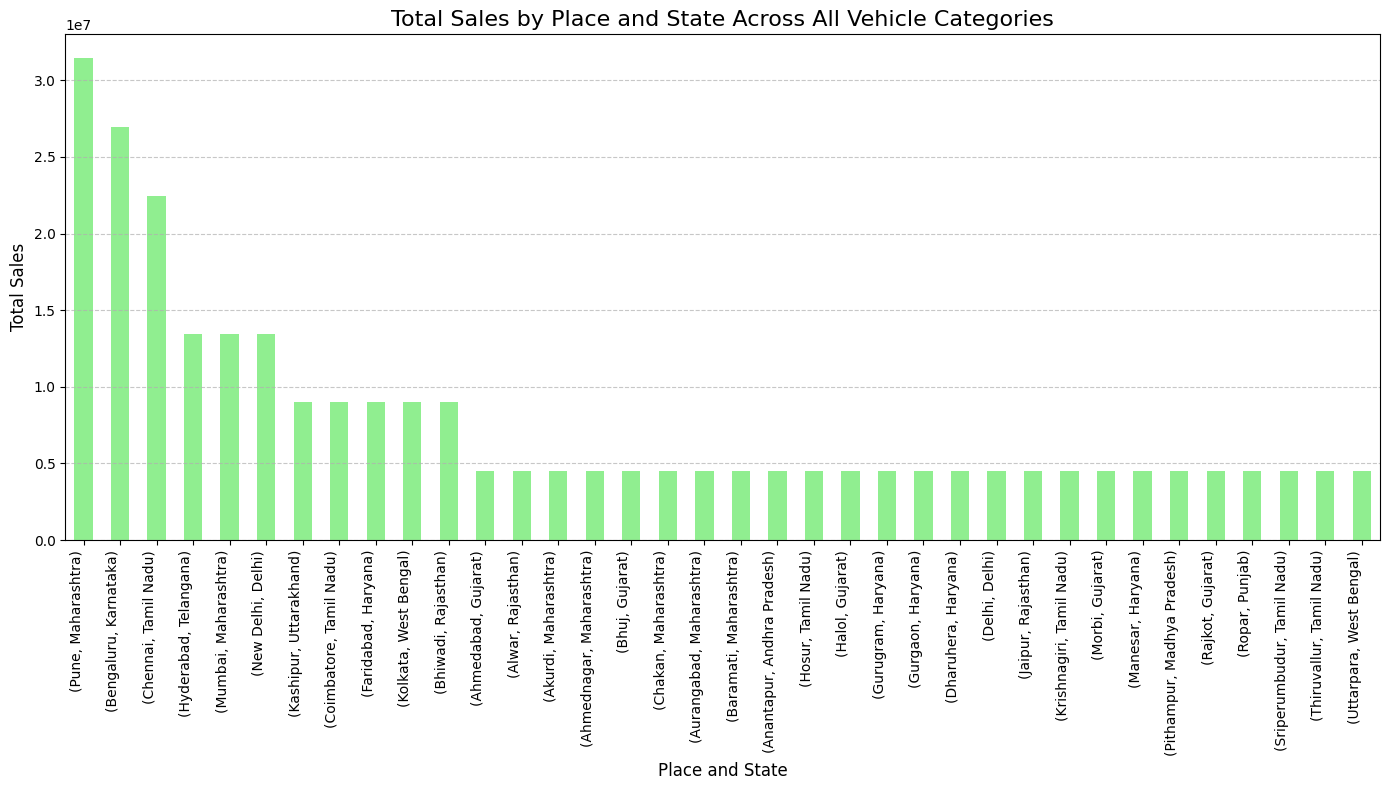

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# merged_data = ev_maker_by_place.merge(ev_cat, how='cross')

# 1. **Total Sales by Vehicle Category Across All Places**:
# Sum the sales for each vehicle category across all places and EV makers.
category_sales = merged_data.drop(columns=['EV Maker', 'Place', 'State', 'Date']).sum()

# Display total sales for each vehicle category
print("Total Sales for Each Vehicle Category Across All Places:")
print(category_sales)

# 2. **Total Sales by EV Maker Across All Places**:
# Group by 'EV Maker' and sum the sales for all categories.
maker_sales = merged_data.groupby('EV Maker').sum().drop(columns=['Date', 'Place', 'State'])

# Display total sales by EV Maker
print("\nTotal Sales by EV Maker Across All Places:")
print(maker_sales)

# 3. **Total Sales by Place and State**:
# Group by 'Place' and 'State', then sum the sales for each vehicle category.
place_state_sales = merged_data.groupby(['Place', 'State']).sum().drop(columns=['Date', 'EV Maker'])

# Display total sales by Place and Statea
print("\nTotal Sales by Place and State:")
print(place_state_sales)

# 4. **Visualization - Total Sales for Each Vehicle Category**:
plt.figure(figsize=(12, 6))
category_sales.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Sales for Each Vehicle Category Across All Places', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Vehicle Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. **Visualization - Total Sales by EV Maker**:
plt.figure(figsize=(12, 6))
maker_sales.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Total Sales by EV Maker Across All Places', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('EV Maker', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. **Visualization - Total Sales by Place and State**:
plt.figure(figsize=(14, 8))
place_state_sales.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Place and State Across All Vehicle Categories', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Place and State', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
